<a href="https://colab.research.google.com/github/victoriacnelson/Beyond-Calories/blob/main/Beyond_Calories_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & SetUp

The cell below imports all packages necessary to run this notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import norm as norm
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, LeaveOneOut, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
from sklearn.svm import SVC, SVR

from statistics import mode

Next, read in the data used for this project.  A brief explanation of each dataset can be found below.  More in-depth explanations may be found in the Beyond-Calories project README.  These datasets were cleaned during their creation for this project in the Dataset Creation & Cleaning notebook.

gi_nutrient_full_df - Contains entries for 2367 food items.  For each food item, the dataset contains values including glycemic index, food category, and a unique numerical identifier, as well as nutrient values for variables including carbohydrates, cholesterol, and fiber.  This dataset was created for this project by joining two existing datasets along a shared value.

gi_oxalate_full_df - Contains entries for 370 of the food items in the previous dataset.  For each food item, values include food subgroup, oxalate value, and glycemic index value.  This dataset was manually created by combining two existing datasets.  Due to the lack of shared unique values, a join was not possible.  Future research may expand upon this dataset to increase the number of entries.

triple_threat_full_df - Contains entries for 300 of the food items included in the previous dataset.  For each food item, glycemic index, oxalate value, and nutritional values are included.  This dataset was created using a join of the two previous datasets along a unique value.

In [3]:
file_path = 'https://raw.githubusercontent.com/victoriacnelson/Beyond-Calories/main/data/final_gi_nutrient_4_3_24.csv'
gi_nutrient_full_df = pd.read_csv(file_path)

file_path = 'https://raw.githubusercontent.com/victoriacnelson/Beyond-Calories/main/data/final_oxalate_gi_4_3_24.csv'
gi_oxalate_full_df = pd.read_csv(file_path)

file_path = 'https://raw.githubusercontent.com/victoriacnelson/Beyond-Calories/main/data/triple_threat_4_3_24.csv'
triple_threat_full_df = pd.read_csv(file_path)

## Second Cleaning Pipeline

Because the data was mostly cleaned in the previous notebook, this pipeline checks to ensure the data was properly loaded.  It also drops values which are not important to this project's analysis, but may be useful for future analysis.  For this reason, these values were kept during the first cleaning process, but will be removed during the second cleaning process.

For each dataset, I will get the list of columns before and after the columns are dropped to ensure I'm working with only the desired variables.  I also run some length checks as a reminder of how much data I'm working with for each dataset as this helps me decide which methods to use for which data.

### GI / Nutrient

In [ ]:
gi_nutrient_full_df.columns

Index(['DHQ Food Group Code', 'DHQ Food Group Name', 'CSFII 1994-96 Food Code',
       'Food Description in 1994-96 CSFII', 'GI Value',
       'GI Links to:   Foster-Powel K, Holt, SHA, Brand-Miller JC. International table of glycemic index and glycemic load values: 2002. Am J Clin Nutri 2002;76:5-56.',
       'Category', 'Description', 'Nutrient Data Bank Number',
       'Data.Alpha Carotene', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin',
       'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Niacin',
       'Data.Protein', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium',
       'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium',
       'Data.M

In [ ]:
# Here values not significant to this analysis are dropped

gi_nutrient_df = gi_nutrient_full_df.drop(['DHQ Food Group Code', 'DHQ Food Group Name', 'CSFII 1994-96 Food Code',
       'Food Description in 1994-96 CSFII',
       'GI Links to:   Foster-Powel K, Holt, SHA, Brand-Miller JC. International table of glycemic index and glycemic load values: 2002. Am J Clin Nutri 2002;76:5-56.',
       'Description', 'Nutrient Data Bank Number'], axis = 1)

In [ ]:
gi_nutrient_df.columns

Index(['GI Value', 'Category', 'Data.Alpha Carotene', 'Data.Beta Carotene',
       'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol',
       'Data.Choline', 'Data.Fiber', 'Data.Lutein and Zeaxanthin',
       'Data.Lycopene', 'Data.Niacin', 'Data.Protein', 'Data.Retinol',
       'Data.Riboflavin', 'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin',
       'Data.Water', 'Data.Fat.Monosaturated Fat',
       'Data.Fat.Polysaturated Fat', 'Data.Fat.Saturated Fat',
       'Data.Fat.Total Lipid', 'Data.Major Minerals.Calcium',
       'Data.Major Minerals.Copper', 'Data.Major Minerals.Iron',
       'Data.Major Minerals.Magnesium', 'Data.Major Minerals.Phosphorus',
       'Data.Major Minerals.Potassium', 'Data.Major Minerals.Sodium',
       'Data.Major Minerals.Zinc', 'Data.Vitamins.Vitamin A - RAE',
       'Data.Vitamins.Vitamin B12', 'Data.Vitamins.Vitamin B6',
       'Data.Vitamins.Vitamin C', 'Data.Vitamins.Vitamin E',
       'Data.Vitamins.Vitamin K'],
      dtype='object

In [ ]:
len(gi_nutrient_df)

1993

### GI / Oxalate

In [ ]:
gi_oxalate_full_df.columns

Index(['Food Group', 'Subgroup', 'Food Item', 'Serving size',
       'Oxalate Category', 'Oxalate Value', 'CSFII 1994-96 Food Code',
       'Food Description in 1994-96 CSFII', 'GI Value',
       'GI Links to:   Foster-Powel K, Holt, SHA, Brand-Miller JC. International table of glycemic index and glycemic load values: 2002. Am J Clin Nutri 2002;76:5-56.'],
      dtype='object')

In [ ]:
# Here again, values not significant to this analysis are dropped

gi_oxalate_df = gi_oxalate_full_df.drop(['Food Item', 'Serving size','CSFII 1994-96 Food Code','Food Description in 1994-96 CSFII',
       'GI Links to:   Foster-Powel K, Holt, SHA, Brand-Miller JC. International table of glycemic index and glycemic load values: 2002. Am J Clin Nutri 2002;76:5-56.'
       ], axis = 1)

In [ ]:
len(gi_oxalate_df)

### Triple Threat

In [ ]:
triple_threat_full_df.columns

Index(['DHQ Food Group Code', 'DHQ Food Group Name', 'CSFII 1994-96 Food Code',
       'Category', 'Description', 'Nutrient Data Bank Number',
       'Data.Alpha Carotene', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin',
       'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Niacin',
       'Data.Protein', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium',
       'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium',
       'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium',
       'Data.Major Minerals.Sodium', 'Data.Major Minerals.Zinc',
       'Data.Vitamins.Vitamin A - RAE', 'Data.Vitamins.Vitamin B12',
       'Data.Vitamins.Vitamin B

In [ ]:
# One last time, values not significant to this analysis are dropped

triple_threat_df = triple_threat_full_df.drop(['DHQ Food Group Code', 'DHQ Food Group Name', 'CSFII 1994-96 Food Code',
       'Description', 'Nutrient Data Bank Number','Food Item', 'Serving size', 'Oxalate Category', 'Food Description in 1994-96 CSFII',
        'GI Links to:   Foster-Powel K, Holt, SHA, Brand-Miller JC. International table of glycemic index and glycemic load values: 2002. Am J Clin Nutri 2002;76:5-56.'
        ], axis = 1)

In [ ]:
# Getting an overview of the datatypes to see what kind of analysis I can run

triple_threat_df.dtypes

Category                           object
Data.Alpha Carotene                 int64
Data.Beta Carotene                  int64
Data.Beta Cryptoxanthin             int64
Data.Carbohydrate                 float64
Data.Cholesterol                    int64
Data.Choline                      float64
Data.Fiber                        float64
Data.Lutein and Zeaxanthin          int64
Data.Lycopene                       int64
Data.Niacin                       float64
Data.Protein                      float64
Data.Retinol                        int64
Data.Riboflavin                   float64
Data.Selenium                     float64
Data.Sugar Total                  float64
Data.Thiamin                      float64
Data.Water                        float64
Data.Fat.Monosaturated Fat        float64
Data.Fat.Polysaturated Fat        float64
Data.Fat.Saturated Fat            float64
Data.Fat.Total Lipid              float64
Data.Major Minerals.Calcium         int64
Data.Major Minerals.Copper        

In [ ]:
# For this particular dataset, I will create an additional version with only numeric values

triple_threat_numeric_df = triple_threat_df.drop(['Category', 'Food Group', 'Subgroup'], axis = 1)

In [ ]:
len(triple_threat_df)

264

# Data Exploration

Now that my data has been properly loaded and cleaned, I can begin with preliminary visualizations.  These are all organized under the name of the dataset being analyzed.

## GI / Nutrient

In [ ]:
# Create a new glycemic index / nutrient value dataframe with only numeric values
gi_nutrient_numeric_df = gi_nutrient_df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix with the new dataframe
gi_nutrient_corr_matrix = gi_nutrient_numeric_df.corr()

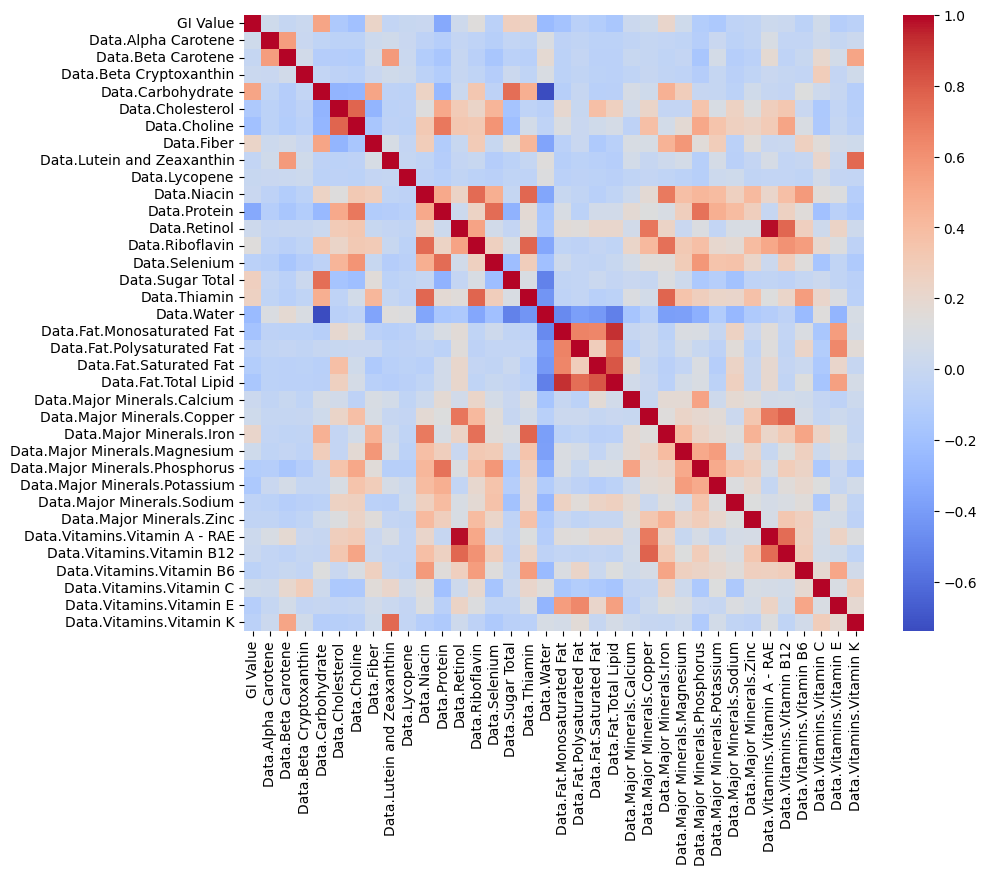

In [ ]:
# Plot this correlation matrix as a heatmap to get an overview of relationships within the data

plt.figure(figsize=(10, 8))
sns.heatmap(gi_nutrient_corr_matrix, annot=False, cmap='coolwarm')
plt.show()

Based on the heatmap above, there were some strong but not incredibly surprising correlations.  For instance, Retinol and Vitamin A RAE were highly correlated.  This makes sense as RAE stands for "Retinol Activity Equivalents".  As a result of FDA labeling rules which took effect in 2020 and 2021, Vitamin A is now listed in mcg RAE rather than in IUs as it had previously been labeled.

Nest, I'd like to get an idea of the distribution of Glycemic Index values to see if any trends pop out.  I'll take the average GI value for each food Category and display this as a bar chart.

<ipython-input-18-0927bd6e8125>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GI Value', y='Category', data=avg_GI_val_sorted, palette='viridis')


<Figure size 1000x3000 with 0 Axes>

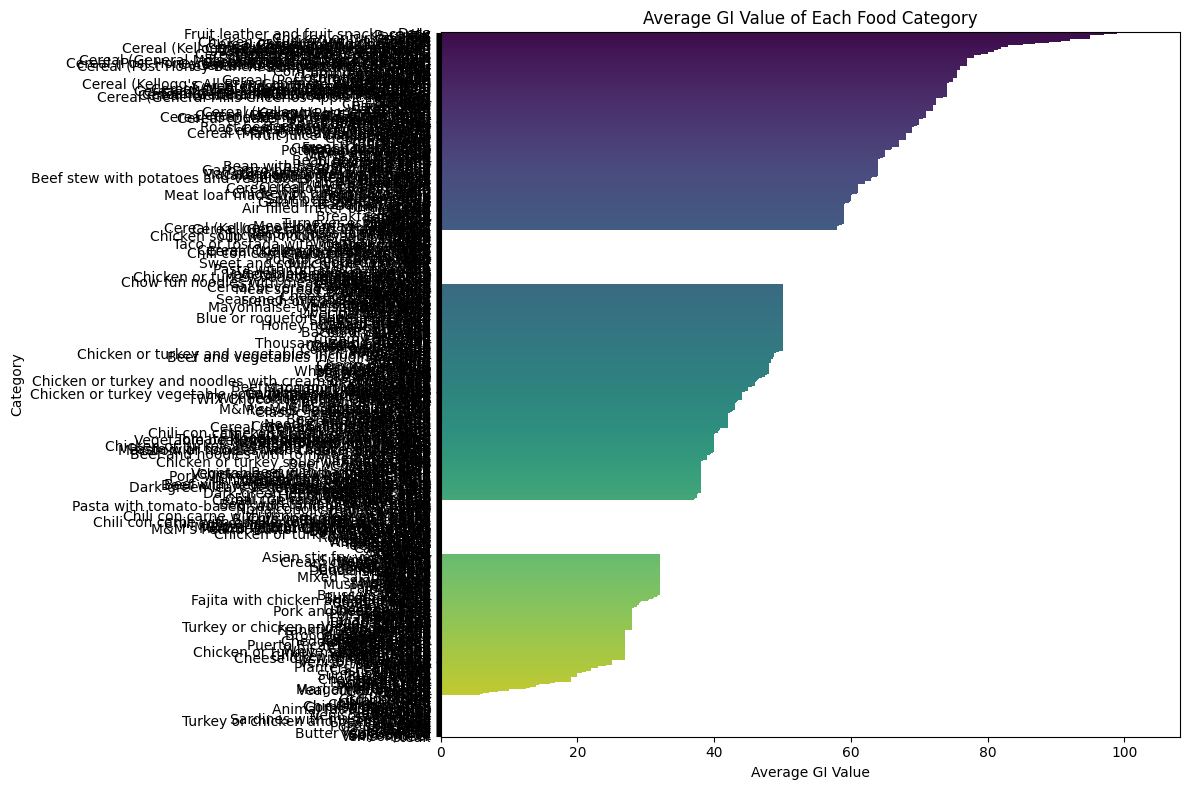

In [ ]:
plt.figure(figsize=(10, 30))
# Take the mean for each category
avg_GI_val = gi_nutrient_df.groupby('Category')['GI Value'].mean().reset_index()
# Sort these averages in descending order
avg_GI_val_sorted = avg_GI_val.sort_values(by='GI Value', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='GI Value', y='Category', data=avg_GI_val_sorted, palette='viridis')
plt.title('Average GI Value of Each Food Category')
plt.xlabel('Average GI Value')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Wow, this looks horrible.  There are so many food categories it's almost impossible to discern which value corresponds to which category.  In light of this, I'm going to approach this analysis in another way.

Below is a histogram showing the distribution of Glycemic Index values across the entire dataset.

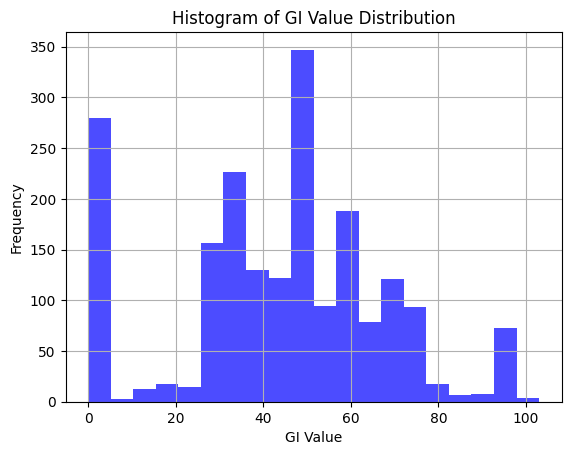

In [ ]:
plt.hist(gi_nutrient_df['GI Value'], bins=20, alpha=0.7, color='blue')
plt.title('Histogram of GI Value Distribution')
plt.xlabel('GI Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What I notice the most here is that there is a surprising number of food items appearing to have GI values around 0, 30, and 50.  In particular, the high concentration of values right at 50 seems odd to me.  We'll look at this more later on.

I also want to get an idea of the distribution of Cholesterol values, shown below.

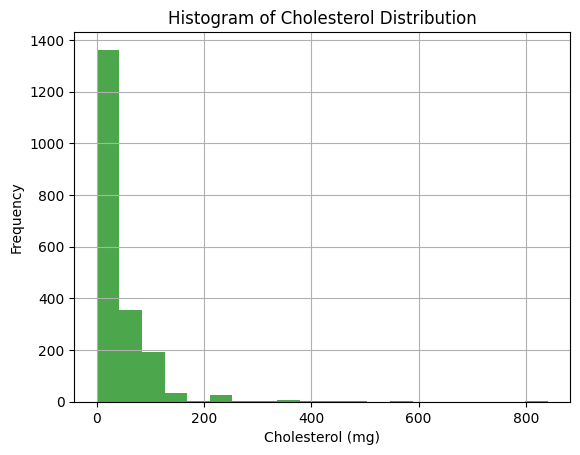

In [ ]:
plt.hist(gi_nutrient_df['Data.Cholesterol'], bins=20, alpha=0.7, color='green')
plt.title('Histogram of Cholesterol Distribution')
plt.xlabel('Cholesterol (mg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This is also interesting.  The overwhelming majority of food items in this dataset appear to have very low levels of cholesterol, but some have values over 800.

I'm going to remove these outliers and get an idea of trends in the values under 200.

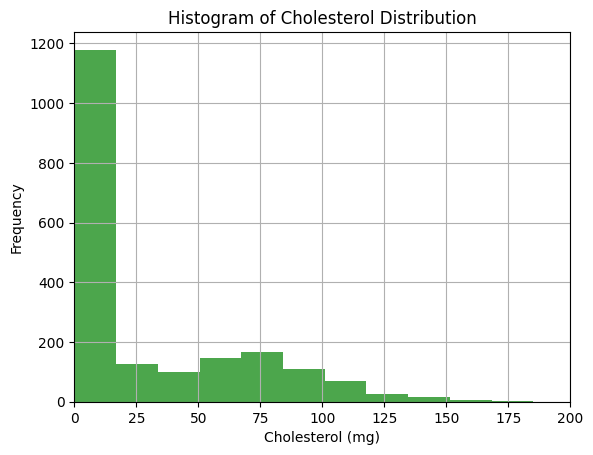

In [ ]:
plt.hist(gi_nutrient_df['Data.Cholesterol'], bins=50, alpha=0.7, color='green')
plt.title('Histogram of Cholesterol Distribution')
plt.xlabel('Cholesterol (mg)')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.grid(True)
plt.show()

When we zoom in a bit more, the data seems almost bimodal, with the first and most substantial mode around 0-20 and the less substantial mode around 70-90.

I'm curious next to check if there are any trends when comparing cholesterol values with gyclemic index.  Based on my existing knowledge of these values, I would expect foods higher in cholesterol, which tend to be animal-based, to be lower in glycemic index.  This is because glycemic index is largely influence by grams of disgestible fiber, and digestible fiber levels are higher in plant-based foods than animal-based foods.

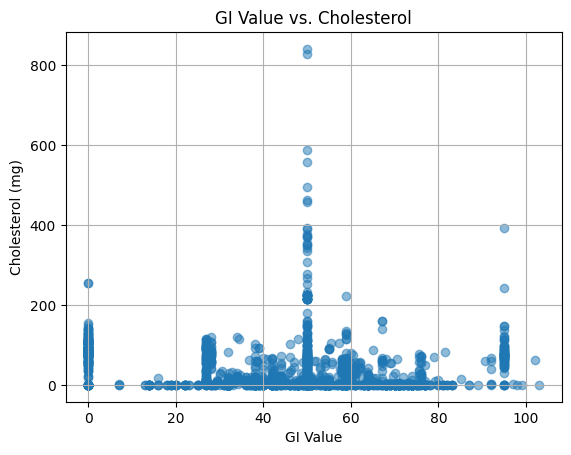

In [ ]:
plt.scatter(gi_nutrient_df['GI Value'], gi_nutrient_df['Data.Cholesterol'], alpha=0.5)

plt.title('GI Value vs. Cholesterol')
plt.xlabel('GI Value')
plt.ylabel('Cholesterol (mg)')
plt.grid(True)
plt.show()

Fascinating.  This isn't anywhere close to the trendline I would have expected to see. There are a few foods wiht both low GI and low cholesterol, and more foods with high values for both variables.  Additionally, it seems most foods in the dataset simply have low values for cholesterol content.

Another thing that grabs my attention is the lines present around 0, 30, and especially 50 for the GI value.  This seems to indicate a concentration of food items with these exact values.  I will continue exploring this later on as it raises some questions about why this is so.

Because cholesterol and glycemic index are so heavily discussed when it comes to nutrition, I'd like to run some further analysis on these two variables.  To prepare for this, I'm going to create new dataframes to separate foods into groups based on their cholesterol and glycemic index values.

I'll start by getting an idea of the data distribution below.

In [ ]:
gi_nutrient_df['Data.Cholesterol'].describe()

count    1993.000000
mean       35.396889
std        62.968601
min         0.000000
25%         0.000000
50%         5.000000
75%        60.000000
max       841.000000
Name: Data.Cholesterol, dtype: float64

In [ ]:
gi_nutrient_df['GI Value'].describe()

count    1993.000000
mean       43.504767
std        24.259274
min         0.000000
25%        32.000000
50%        48.000000
75%        59.000000
max       103.000000
Name: GI Value, dtype: float64

Based on these results, I'll separate the data into high, average, and low categories for both cholesterol and GI.  This will be based off of the standard deviations above.  Foods in the 75th percentile or above are labelled as "high", between the 50th and 75th are labelled as "avg" and at the 25th or below are labelled as "low".  I'll create these new dataframes here so I have them for future use.

In [ ]:
high_cholersterol = gi_nutrient_df[gi_nutrient_df['Data.Cholesterol'] >=60]
high_gi = gi_nutrient_df[gi_nutrient_df['GI Value'] >=59]

avg_cholersterol = gi_nutrient_df[(gi_nutrient_df['Data.Cholesterol'] < 60) & (gi_nutrient_df['Data.Cholesterol'] > 0)]
avg_gi = gi_nutrient_df[(gi_nutrient_df['GI Value'] < 59) & (gi_nutrient_df['GI Value'] > 32)]

low_cholersterol = gi_nutrient_df[gi_nutrient_df['Data.Cholesterol'] <=0]
low_gi = gi_nutrient_df[gi_nutrient_df['GI Value'] <= 32]

### Additional Visualizations

I'll continue looking at the data below with some 3D interactive plots.  First, we'll take a look at trends in the various types of fat composition and see if there is any obvious relationship with GI value.

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=gi_nutrient_df['Data.Fat.Monosaturated Fat'],
    y=gi_nutrient_df['Data.Fat.Polysaturated Fat'],
    z=gi_nutrient_df['Data.Fat.Saturated Fat'],
    mode='markers',
    marker=dict(
        size=5,
        color=gi_nutrient_df['GI Value'],
        colorscale='Viridis',
        colorbar=dict(title='GI Value'),
        opacity=0.8))])
fig.update_layout(
    title='Fats Composition vs. GI Value',
    scene=dict(
        xaxis_title='Monosaturated Fat',
        yaxis_title='Polysaturated Fat',
        zaxis_title='Saturated Fat'))
fig.show()

I'm wondering if there was a typo in the labeling of this dataset - should this be Polyunsatuated?

Saturated fats are found in animal-based foods like beef, pork, poultry, full-fat dairy products and eggs and tropical oils like coconut, and palm.
- linked with increase in LDL cholesterol
- butter, cheese, red meat, ice cream

Polyunsaturated fats are fat molecules that have more than one unsaturated carbon bond in the molecule.
- linked with reduction in LDL cholersterol
- canola oil, corn oil, soybean oil, fatty fish, nut, seeds, tofu

Monounsaturated fats are fat molecules that have one unsaturated carbon bond in the molecule.
- linked with reduction in LDL cholesterol
- olive oil, safflower oil, peanut oil, avocados, some nuts & seeds

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=gi_nutrient_df['Data.Carbohydrate'],
    y=gi_nutrient_df['Data.Sugar Total'],
    z=gi_nutrient_df['Data.Fat.Total Lipid'],
    mode='markers',
    marker=dict(
        size=5,
        color=gi_nutrient_df['GI Value'],
        colorscale='Viridis',
        colorbar=dict(title='GI Value'),
        opacity=0.8))])
fig.update_layout(
    title='Carbs, Sugar, and Lipid Contents vs. GI Value',
    scene=dict(
        xaxis_title='Carbohydrate',
        yaxis_title='Total Sugar',
        zaxis_title='Total Lipid'))
fig.show()

## Oxalate

Similar to before, I want to get a preliminary overview of the oxalate and GI values dataset. However, because this dataset has fewer datapoints that the GI and nutrient dataset, but less information than the combination of all 3 datasets, I won't use this dataset on its own for much analysis.

In [ ]:
# Checking my column names

gi_oxalate_df.columns

Index(['Food Group', 'Subgroup', 'Oxalate Category', 'Oxalate Value',
       'GI Value'],
      dtype='object')

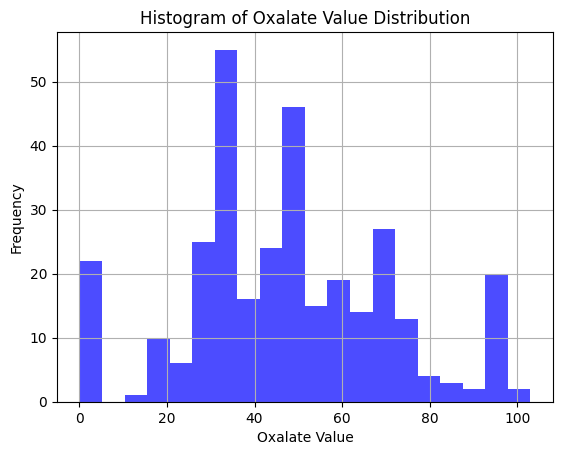

In [ ]:
# Getting an idea of the oxalate value distribution

plt.hist(gi_oxalate_df['GI Value'], bins=20, alpha=0.7, color='blue')
plt.title('Histogram of Oxalate Value Distribution')
plt.xlabel('Oxalate Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This distribution also has a couple of value ranges with high concentration, around 30 and 50.  I'm curious oif this is naturally ocurring or if it has something to do with the data collection process.  While there are a few highly concentrated values, this data encompasses a good spread of oxalate values.

## Triple Threat

While this dataset has the fewest total datapoints, it does contain the largest number of predictors.  It will be interesting to compare results from this dataset to the full GI nutrient dataset.

Below, I'm reminding myself what is in the dataset, and getting an idea of possible trends with a correlation matrix heatmap.

In [ ]:
# See first 5 entries
triple_threat_df.head()

,Category,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,...,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Food Group,Subgroup,Oxalate Value,GI Value
0,Milk,0,7,0,4.67,12,17.8,0.0,0,0,...,32,0.54,0.061,0.0,0.05,0.3,Dairy,Milk,1,27.0
1,Milk,0,7,0,4.67,12,17.8,0.0,0,0,...,32,0.54,0.061,0.0,0.05,0.3,Beverages,Dairy Beverages,1,27.0
2,Milk,0,7,0,4.67,12,17.8,0.0,0,0,...,32,0.54,0.061,0.0,0.05,0.3,Dairy,Milk,1,27.0
3,Milk,0,7,0,4.67,12,17.8,0.0,0,0,...,32,0.54,0.061,0.0,0.05,0.3,Beverages,Dairy Beverages,1,27.0
4,Milk,0,7,0,4.67,12,17.8,0.0,0,0,...,32,0.54,0.061,0.0,0.05,0.3,Dairy,Milk,1,27.0


In [ ]:
# Distribution of numeric data
triple_threat_df.describe()

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Oxalate Value,GI Value
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.00000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,36.719697,302.757576,9.212121,18.902235,27.189394,30.370833,1.943561,220.450758,83.450758,2.540102,...,253.886364,1.246098,120.102273,1.12250,0.223826,8.837879,1.051894,15.656818,9.481061,44.392045
std,309.863856,1185.806550,48.600494,23.208789,54.006003,41.070048,2.881730,960.050009,673.543959,5.508541,...,335.705594,4.120211,597.836277,4.88256,0.626859,22.081548,3.518640,56.649694,42.621060,22.133528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,4.417500,0.000000,9.175000,0.000000,0.000000,0.000000,0.131000,...,17.500000,0.240000,1.000000,0.00000,0.049750,0.000000,0.070000,0.200000,0.000000,32.000000
50%,0.000000,4.000000,0.000000,9.570000,0.000000,17.300000,1.000000,5.500000,0.000000,0.709000,...,114.500000,0.440000,20.500000,0.06500,0.087500,0.500000,0.330000,1.700000,1.000000,42.000000
75%,0.000000,45.000000,0.000000,21.095000,30.250000,31.650000,2.700000,71.250000,0.000000,2.829250,...,402.000000,0.990000,64.000000,0.58000,0.174250,5.925000,0.905000,7.000000,7.000000,58.000000
max,3477.000000,10920.000000,589.000000,87.900000,393.000000,422.500000,20.300000,12198.000000,9037.000000,69.000000,...,2955.000000,51.700000,9363.000000,69.99000,6.900000,207.000000,46.350000,482.900000,656.000000,103.000000


In [ ]:
# Reminder of column names for later reference
triple_threat_df.columns

Index(['Category', 'Data.Alpha Carotene', 'Data.Beta Carotene',
       'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol',
       'Data.Choline', 'Data.Fiber', 'Data.Lutein and Zeaxanthin',
       'Data.Lycopene', 'Data.Niacin', 'Data.Protein', 'Data.Retinol',
       'Data.Riboflavin', 'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin',
       'Data.Water', 'Data.Fat.Monosaturated Fat',
       'Data.Fat.Polysaturated Fat', 'Data.Fat.Saturated Fat',
       'Data.Fat.Total Lipid', 'Data.Major Minerals.Calcium',
       'Data.Major Minerals.Copper', 'Data.Major Minerals.Iron',
       'Data.Major Minerals.Magnesium', 'Data.Major Minerals.Phosphorus',
       'Data.Major Minerals.Potassium', 'Data.Major Minerals.Sodium',
       'Data.Major Minerals.Zinc', 'Data.Vitamins.Vitamin A - RAE',
       'Data.Vitamins.Vitamin B12', 'Data.Vitamins.Vitamin B6',
       'Data.Vitamins.Vitamin C', 'Data.Vitamins.Vitamin E',
       'Data.Vitamins.Vitamin K', 'Food Group', 'Subgroup', 'Oxala

Another interesting aspect of this dataset is that it effectively has 3 different versions of classification for each food.  These classifications differe greatly for some foods, not as much for others, and may be useful for later classification problems.

Below, I will get a list of the unique values within each classificaiton variable so they can be referenced later.

In [ ]:
triple_threat_df['Category'].unique()

array(['Milk', 'Buttermilk', 'Coffee creamer', 'Cream', 'Chocolate milk',
       'Yogurt', 'Cottage cheese', 'Cheese', 'Sour cream', 'Cream cheese',
       'Cream cheese spread', 'Ice cream', 'Light ice cream', 'Custard',
       'Pudding', 'Venison/deer', 'Venison/deer jerky', 'Ham',
       'Pork chop', 'Pork bacon', 'Frankfurter or hot dog', 'Beef liver',
       'Bologna', 'Turkey', 'Tuna', 'Cod', 'Mackerel', 'Salmon',
       'Swordfish', 'Whiting', 'Crab', 'Shrimp', 'Flounder', 'Haddock',
       'Herring', 'Sardines', 'Clams', 'Oysters', 'Egg', 'Soybean soup',
       'Muffin', 'Bread', 'Breadsticks', 'Graham crackers', 'Rice cake',
       'Crackers', 'Cornbread', 'Biscuit', 'Cookie', 'Pie',
       'Tortilla chips', 'Popcorn', 'Cashews', 'Mixed nuts', 'Peanuts',
       'Pecans', 'Walnuts', 'Sunflower seeds', 'Pancakes', 'French toast',
       'Grits', 'Cereal (Uncle Sam)',
       "Cereal (Kellogg's All-Bran Complete Wheat Flakes)",
       'Cereal (Kashi 7 Whole Grain Puffs)',
       '

In [ ]:
triple_threat_df['Food Group'].unique()

array(['Dairy', 'Beverages', 'Cakes, Candies, Cookies & Pudding Snacks',
       'Meats & Fish', 'Breakfast Items', 'Breads & Grains',
       'Crackers, Chips & Miscellaneous', 'Nuts and Seeds',
       'Other Cereal Brands', 'Cereals by Manufacturer', 'Fruits',
       'Vegetables'], dtype=object)

In [ ]:
triple_threat_df['Subgroup'].unique()

array(['Milk', 'Dairy Beverages', 'Cream Products', 'Yogurt Products',
       'Cheese Products', 'Dairy Spreads', 'Ice Creams',
       'Cakes, Candies, Cookies & Pudding Snacks',
       'Meat & Meat Alternatives', 'Breakfast Items', 'Fish', 'Eggs',
       'Pastas, Rice & Grains', 'Breads',
       'Crackers, Chips & Miscellaneous', 'Nuts and Seeds',
       'Other Cereal Brands',
       "\xa0Kellogg's\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0",
       'Quaker', 'Post Cereals', 'Breads & Grains', 'Whole Fruits',
       'Canned Fruits', 'Dried Fruits', 'Beverages', 'Vegetables',
       'Potatoes', 'Alcoholic Beverages'], dtype=object)

Once again, I'd like to get an idea of the relationships within the data using a correlaiton matrix and heatmap.  I'll create a new dataframe which filters out all non-numeric data.  This may be useful to have on hand for future analyssi and predictions as well.

In [ ]:
# Filter to include only numeric values
triple_threat_numeric_df = triple_threat_df.select_dtypes(include=['float64', 'int64'])
# Create the correlation matrix
triple_threat_corr_matrix = triple_threat_numeric_df.corr()

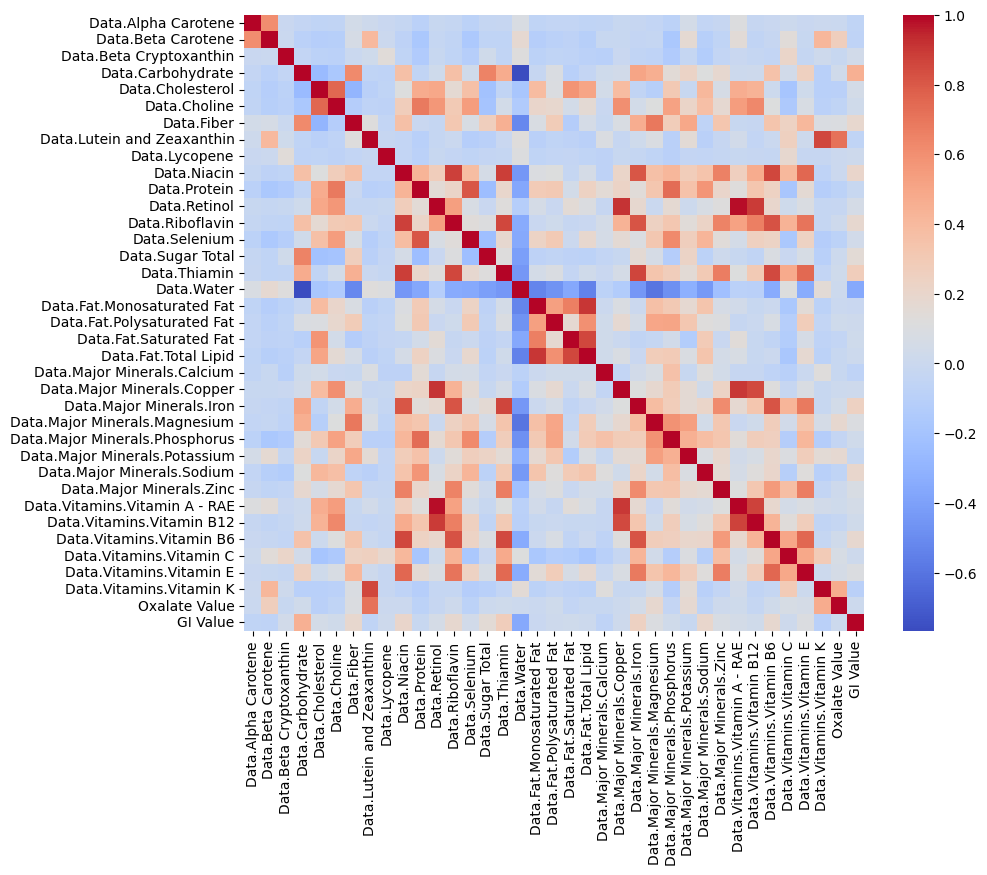

In [ ]:
# Create the heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(triple_threat_corr_matrix, annot=False, cmap='coolwarm')
plt.show()

Because this dataset has far fewer entries than the larger GI nutrient one, I'd like to see how much the values for cholesterol and GI have changed.

In [ ]:
triple_threat_df['Data.Cholesterol'].describe()

count    264.000000
mean      27.189394
std       54.006003
min        0.000000
25%        0.000000
50%        0.000000
75%       30.250000
max      393.000000
Name: Data.Cholesterol, dtype: float64

In [ ]:
triple_threat_df['GI Value'].describe()

### Additional Visualizations

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=triple_threat_df['Data.Cholesterol'],
    y=triple_threat_df['Data.Sugar Total'],
    z=triple_threat_df['Data.Fat.Total Lipid'],
    mode='markers',
    marker=dict(
        size=5,
        color=triple_threat_df['Oxalate Value'],
        colorscale='Viridis',
        colorbar=dict(title='Oxalate Value'),
        cmin = 0,
        cmax = 100,
        opacity=0.8,))])
fig.update_layout(
    title='Cholesterol, Sugar, and Lipid Count vs. Oxalate Value',
    scene=dict(
        xaxis_title='Cholesterol',
        yaxis_title='Total Sugar',
        zaxis_title='Total Lipid'))
fig.show()

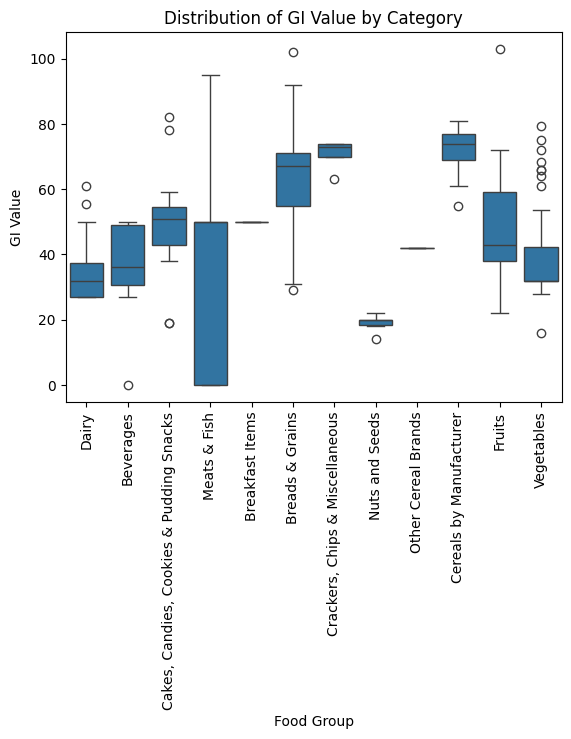

In [ ]:
sns.boxplot(x='Food Group', y='GI Value', data=triple_threat_df)

plt.title('Distribution of GI Value by Category')
plt.xlabel('Food Group')
plt.ylabel('GI Value')
plt.xticks(rotation = 90)

plt.show()

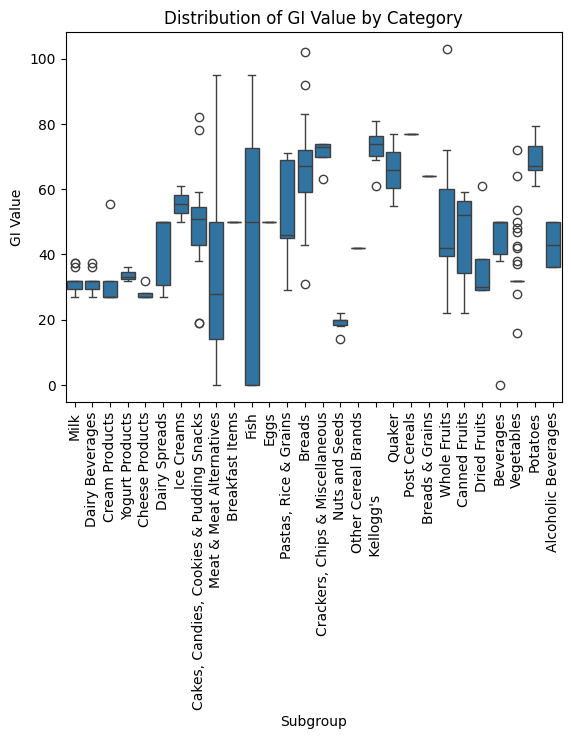

In [ ]:
sns.boxplot(x='Subgroup', y='GI Value', data=triple_threat_df)

plt.title('Distribution of GI Value by Category')
plt.xlabel('Subgroup')
plt.ylabel('GI Value')
plt.xticks(rotation = 90)

plt.show()

## High Cholesterol

<ipython-input-44-25e95b5ec1fb>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x3000 with 0 Axes>

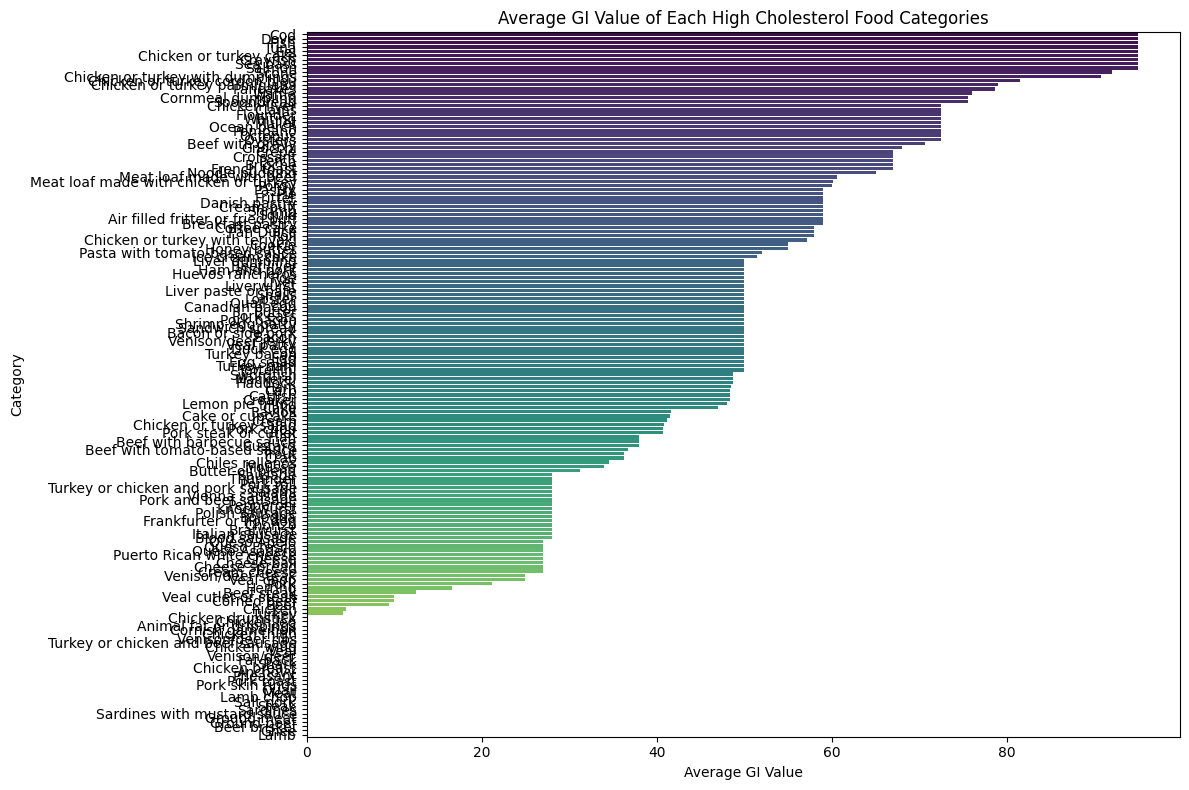

In [ ]:
plt.figure(figsize=(10, 30))
avg_GI_val_high_chol = high_cholersterol.groupby('Category')['GI Value'].mean().reset_index()

avg_GI_val_high_chol_sorted = avg_GI_val_high_chol.sort_values(by='GI Value', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='GI Value', y='Category', data=avg_GI_val_high_chol_sorted, palette='viridis')

plt.title('Average GI Value of Each High Cholesterol Food Categories')
plt.xlabel('Average GI Value')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

## Low GI

<ipython-input-45-8ded815f799e>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x3000 with 0 Axes>

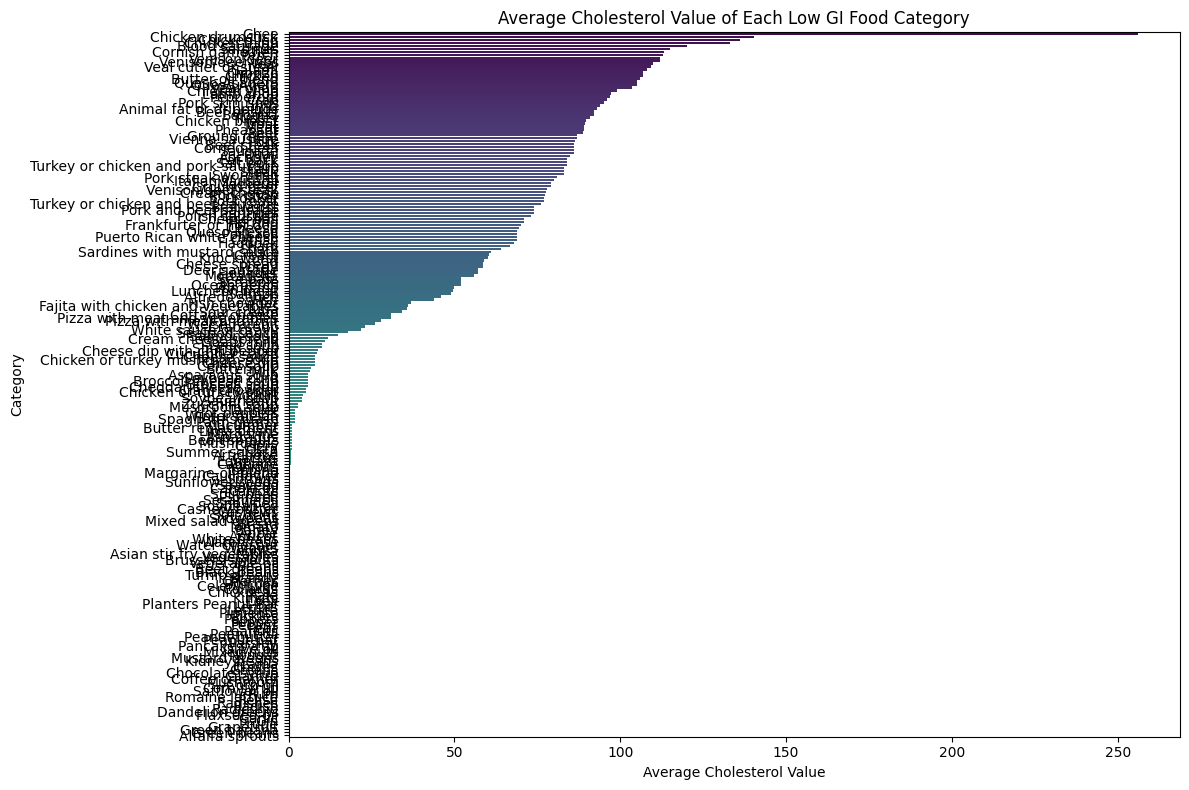

In [ ]:
plt.figure(figsize=(10, 30))
avg_chol_low_gi = low_gi.groupby('Category')['Data.Cholesterol'].mean().reset_index()

avg_chol_low_gi_sorted = avg_chol_low_gi.sort_values(by='Data.Cholesterol', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Data.Cholesterol', y='Category', data=avg_chol_low_gi_sorted, palette='viridis')

plt.title('Average Cholesterol Value of Each Low GI Food Category')
plt.xlabel('Average Cholesterol Value')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Permutation test

Comparing GI of high cholersterol foods vs. average & low cholesterol foods

"High" threshold is at or above 75%

In [ ]:
high_cholersterol_gi_avg = high_cholersterol['GI Value'].mean()
low_avg_cholersterol = gi_nutrient_df[gi_nutrient_df['Data.Cholesterol'] <60]
low_avg_cholersterol_gi_avg = low_avg_cholersterol['GI Value'].mean()
print(high_cholersterol_gi_avg,low_avg_cholersterol_gi_avg)

32.83589743589744 47.14481830417228


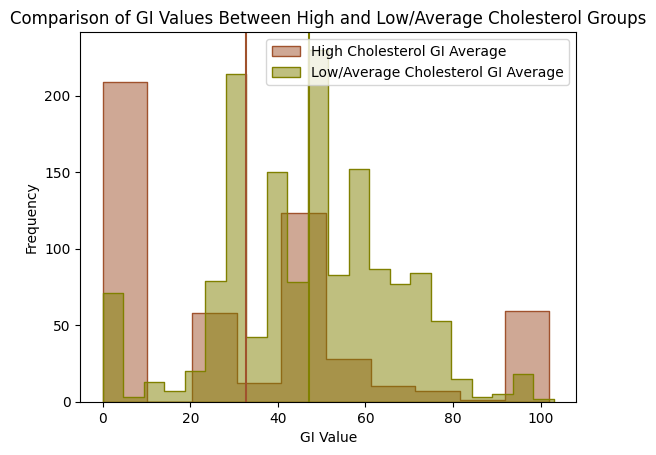

In [ ]:
sns.histplot(data=high_cholersterol, x="GI Value", label='High Cholesterol GI Average', color="sienna", alpha=0.5, element="step")
sns.histplot(data=low_avg_cholersterol, x="GI Value", label='Low/Average Cholesterol GI Average', color="olive", alpha=0.5, element="step")

plt.axvline(x=high_cholersterol_gi_avg, color="sienna")
plt.axvline(x=low_avg_cholersterol_gi_avg, color="olive")

plt.title('Comparison of GI Values Between High and Low/Average Cholesterol Groups')
plt.xlabel("GI Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
def compute_test_stat(low_avg_cholersterol_gi, high_cholersterol_gi):
    test_stat = low_avg_cholersterol_gi - high_cholersterol_gi
    return test_stat

In [ ]:
ov = compute_test_stat(low_avg_cholersterol_gi_avg, high_cholersterol_gi_avg)
print(ov)

14.308920868274846


In [ ]:
all_gi = np.array(gi_nutrient_df['Data.Cholesterol'].values)
print(all_gi)

[12 12 12 ...  0  0  0]


In [ ]:
gi_cat_tf = np.array(gi_nutrient_df['Data.Cholesterol'] >= 60)
print(gi_cat_tf)

# True = high cholesterol / False = low/avg cholesterol

[False False False ... False False False]


In [ ]:
if(len(all_gi) == len(gi_cat_tf)):
  print("true")

true


In [ ]:
cholesterol_cat = [True, False]
sim_cholesterol_cat = np.random.choice(cholesterol_cat, len(all_gi))
print(sim_cholesterol_cat)
print(all_gi)

[False  True False ... False  True  True]
[12 12 12 ...  0  0  0]


In [ ]:
def compute_stat_one_trial(sim_cholesterol_cat, all_gi):

  sim_high_chol_gi_val = all_gi[sim_cholesterol_cat == True]
  sim_lowavg_chol_gi_val = all_gi[sim_cholesterol_cat == False]

  avg_gi_high_chol = np.average(sim_high_chol_gi_val)
  avg_gi_lowavg_chol = np.average(sim_lowavg_chol_gi_val)

  test_stat = compute_test_stat(avg_gi_lowavg_chol, avg_gi_high_chol)
  return test_stat

In [ ]:
compute_stat_one_trial(sim_cholesterol_cat, all_gi)

-0.07008872372780672

In [ ]:
n = 10000
test_stat_array = []

for i in range(n):
  sim_cholesterol_cat = np.random.choice(cholesterol_cat, len(all_gi))
  stat = compute_stat_one_trial(sim_cholesterol_cat, all_gi)
  test_stat_array.append(stat)

In [ ]:
test_stat_array = np.array(test_stat_array)
test_stat_array

array([ 0.79509336,  0.04151233, -2.916711  , ..., -3.51734833,
        0.95315225,  3.45033452])

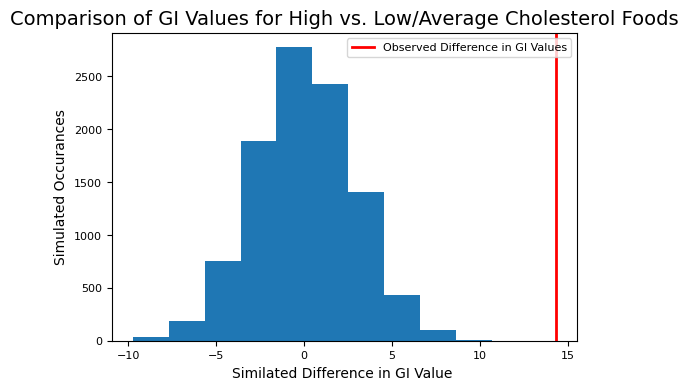

In [ ]:
plt.figure(figsize=(6,4))

plt.hist(test_stat_array)
plt.axvline(x = ov, c = 'r', label = 'Observed Difference in GI Values', linewidth=2)
plt.title('Comparison of GI Values for High vs. Low/Average Cholesterol Foods', fontsize=14)
plt.xlabel("Similated Difference in GI Value ", fontsize=10) #Calculated as Low/Avg Cholesterol - High Cholesterol
plt.ylabel("Simulated Occurances", fontsize=10) # of the Test Stat
plt.legend(fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
plt.savefig('/content/drive/MyDrive/PortProj24/GI_Val_High_Low_Cholesterol.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.clf() # clears fig

In [ ]:
empirical_p = np.count_nonzero(test_stat_array >= ov) / n
print(empirical_p)

0.0


# DO NOT RUN Bootstrap (Oxalates)

Do foods with higher cholestrol have lower oxalate content?

Redefining "high" cholesterol since 75% decreased from ~ 60 to ~ 30 due to differences in dataset after joining with oxalate values

Many entries in OG dataset contained full meals that were not present in oxalate dataset, so it makes sense this number is so much lower

In [ ]:
high_cholesterol = triple_threat_df[triple_threat_df['Data.Cholesterol'] >=30.25]
high_oxalate = triple_threat_df[triple_threat_df['Oxalate Value'] >=7]

low_cholesterol = triple_threat_df[triple_threat_df['Data.Cholesterol'] < 30.25]
low_oxalate = triple_threat_df[triple_threat_df['Oxalate Value'] < 7]

In [ ]:
# average oxalate content for high cholesterol foods
high_cholesterol_avg_oxalate_content = high_cholesterol['Oxalate Value'].mean()
print(high_cholesterol_avg_oxalate_content)

1.1666666666666667


In [ ]:
#bootstrap one mean
def one_bootstrap_mean(df):
  resample = df.sample(n=len(df), replace = True)
  bootstrapped_mean = np.average(resample['Oxalate Value'])
  return bootstrapped_mean

In [ ]:
bootstrap_mean = one_bootstrap_mean(high_cholesterol)
print(bootstrap_mean)

0.8939393939393939


In [ ]:
n = 1000000
boot_means = []
for i in range(n):
    boot_means.append(one_bootstrap_mean(high_cholesterol))

In [ ]:
left_interval_endpoint = np.percentile(boot_means, 2.5)
print(left_interval_endpoint)

right_interval_endpoint = np.percentile(boot_means, 97.5)
print(right_interval_endpoint)

0.5303030303030303
1.9242424242424243


In [ ]:
ci = np.array([left_interval_endpoint, right_interval_endpoint])
print(ci)

[0.53030303 1.92424242]


In [ ]:
low_cholesterol_avg_oxalate_content = low_cholesterol['Oxalate Value'].mean()
print(low_cholesterol_avg_oxalate_content)

12.252525252525253


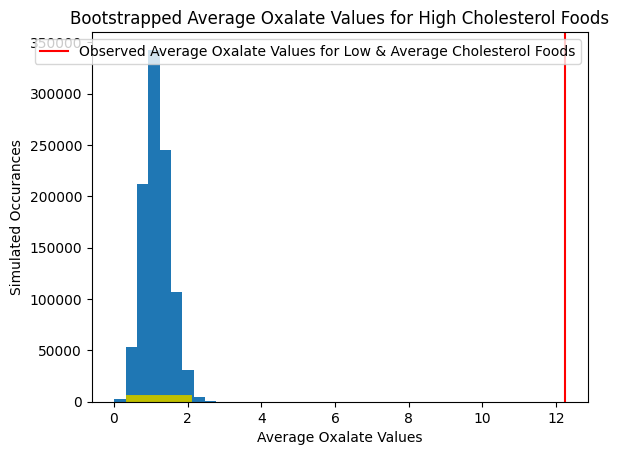

In [ ]:
plt.hist(boot_means)
plt.plot(ci, [0, 0], linewidth = 10, c = 'y')
plt.axvline(x = low_cholesterol_avg_oxalate_content, c = 'r', label = 'Observed Average Oxalate Values for Low & Average Cholesterol Foods')
plt.title("Bootstrapped Average Oxalate Values for High Cholesterol Foods")
plt.xlabel("Average Oxalate Values")
plt.ylabel("Simulated Occurances")
plt.legend()
plt.show()

# Random Forest

## Food Group

In [ ]:
X = triple_threat_df.drop(columns=['Subgroup','Food Group','Category'])
y = triple_threat_df['Food Group']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 3)

In [ ]:
no_bootstrap_model = RandomForestClassifier(n_estimators=100, criterion='gini', bootstrap=False, random_state=42)
no_bootstrap_scores = cross_val_score(no_bootstrap_model, X_train, y_train, cv=5, scoring='accuracy')
no_bootstrap_model.fit(X_train, y_train)
no_bootstrap_pred = no_bootstrap_model.predict(X_test)
no_bootstrap_test_accuracy = accuracy_score(y_test, no_bootstrap_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



In [ ]:
bootstrap_model = RandomForestClassifier(n_estimators=100, criterion='gini', bootstrap=True, random_state=42)
bootstrap_scores = cross_val_score(bootstrap_model, X_train, y_train, cv=5, scoring='accuracy')
bootstrap_model.fit(X_train, y_train)
bootstrap_pred = bootstrap_model.predict(X_test)
bootstrap_test_accuracy = accuracy_score(y_test, bootstrap_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



In [ ]:
print("Average CV Accuracy without bootstrapping:", no_bootstrap_scores.mean())
print("Test Accuracy without bootstrapping:", no_bootstrap_test_accuracy)
print("Classification Report without bootstrapping:")
print(classification_report(y_test, no_bootstrap_pred))

print("Average CV Accuracy with bootstrapping:", bootstrap_scores.mean())
print("Test Accuracy with bootstrapping:", bootstrap_test_accuracy)
print("Classification Report with bootstrapping:")
print(classification_report(y_test, bootstrap_pred))

Average CV Accuracy without bootstrapping: 0.831081081081081
Test Accuracy without bootstrapping: 0.8
Classification Report without bootstrapping:
                                          precision    recall  f1-score   support

                               Beverages       0.43      0.38      0.40         8
                         Breads & Grains       0.89      0.89      0.89         9
                         Breakfast Items       0.00      0.00      0.00         1
Cakes, Candies, Cookies & Pudding Snacks       0.67      0.67      0.67         3
                 Cereals by Manufacturer       1.00      0.67      0.80         3
         Crackers, Chips & Miscellaneous       0.00      0.00      0.00         1
                                   Dairy       0.64      0.64      0.64        14
                                  Fruits       1.00      1.00      1.00         8
                            Meats & Fish       0.87      1.00      0.93        13
                          Nuts a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

## Subgroup

In [ ]:
X = triple_threat_df.drop(columns=['Subgroup','Food Group','Category'])
y = triple_threat_df['Subgroup']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 3)

In [ ]:
no_bootstrap_model = RandomForestClassifier(n_estimators=100, criterion='gini', bootstrap=False, random_state=42)
no_bootstrap_scores = cross_val_score(no_bootstrap_model, X_train, y_train, cv=5, scoring='accuracy')
no_bootstrap_model.fit(X_train, y_train)
no_bootstrap_pred = no_bootstrap_model.predict(X_test)
no_bootstrap_test_accuracy = accuracy_score(y_test, no_bootstrap_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



In [ ]:
bootstrap_model = RandomForestClassifier(n_estimators=100, criterion='gini', bootstrap=True, random_state=42)
bootstrap_scores = cross_val_score(bootstrap_model, X_train, y_train, cv=5, scoring='accuracy')
bootstrap_model.fit(X_train, y_train)
bootstrap_pred = bootstrap_model.predict(X_test)
bootstrap_test_accuracy = accuracy_score(y_test, bootstrap_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



In [ ]:
print("Average CV Accuracy without bootstrapping:", no_bootstrap_scores.mean())
print("Test Accuracy without bootstrapping:", no_bootstrap_test_accuracy)
print("Classification Report without bootstrapping:")
print(classification_report(y_test, no_bootstrap_pred))

print("Average CV Accuracy with bootstrapping:", bootstrap_scores.mean())
print("Test Accuracy with bootstrapping:", bootstrap_test_accuracy)
print("Classification Report with bootstrapping:")
print(classification_report(y_test, bootstrap_pred))

Average CV Accuracy without bootstrapping: 0.7447447447447447
Test Accuracy without bootstrapping: 0.7375
Classification Report without bootstrapping:
                                          precision    recall  f1-score   support

                     Alcoholic Beverages       1.00      1.00      1.00         1
                               Beverages       1.00      0.50      0.67         2
                                  Breads       1.00      0.88      0.93         8
                         Breakfast Items       0.00      0.00      0.00         1
Cakes, Candies, Cookies & Pudding Snacks       0.60      1.00      0.75         3
                           Canned Fruits       1.00      1.00      1.00         1
                         Cheese Products       0.00      0.00      0.00         1
         Crackers, Chips & Miscellaneous       0.00      0.00      0.00         1
                          Cream Products       0.50      0.50      0.50         2
                         Dai

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

# KNN

Let's predict 'Subgroup'

In [ ]:
triple_threat_df.columns

Index(['Category', 'Data.Alpha Carotene', 'Data.Beta Carotene',
       'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol',
       'Data.Choline', 'Data.Fiber', 'Data.Lutein and Zeaxanthin',
       'Data.Lycopene', 'Data.Niacin', 'Data.Protein', 'Data.Retinol',
       'Data.Riboflavin', 'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin',
       'Data.Water', 'Data.Fat.Monosaturated Fat',
       'Data.Fat.Polysaturated Fat', 'Data.Fat.Saturated Fat',
       'Data.Fat.Total Lipid', 'Data.Major Minerals.Calcium',
       'Data.Major Minerals.Copper', 'Data.Major Minerals.Iron',
       'Data.Major Minerals.Magnesium', 'Data.Major Minerals.Phosphorus',
       'Data.Major Minerals.Potassium', 'Data.Major Minerals.Sodium',
       'Data.Major Minerals.Zinc', 'Data.Vitamins.Vitamin A - RAE',
       'Data.Vitamins.Vitamin B12', 'Data.Vitamins.Vitamin B6',
       'Data.Vitamins.Vitamin C', 'Data.Vitamins.Vitamin E',
       'Data.Vitamins.Vitamin K', 'Food Group', 'Subgroup', 'Oxala

In [ ]:
x = triple_threat_df.drop(columns=['Subgroup','Food Group','Category'])
y = triple_threat_df['Subgroup']

In [ ]:
x

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Oxalate Value,GI Value
0,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,38,0.41,32,0.54,0.061,0.0,0.05,0.3,1,27.0
1,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,38,0.41,32,0.54,0.061,0.0,0.05,0.3,1,27.0
2,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,38,0.41,32,0.54,0.061,0.0,0.05,0.3,1,27.0
3,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,38,0.41,32,0.54,0.061,0.0,0.05,0.3,1,27.0
4,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,38,0.41,32,0.54,0.061,0.0,0.05,0.3,1,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0.00,0,0.0,0.0,0,0,0.000,...,6,0.00,0,0.00,0.000,0.0,0.00,0.0,0,0.0
260,0,0,0,41.60,0,0.0,0.0,0,0,0.003,...,5,0.04,0,0.00,0.000,0.0,0.00,0.0,0,50.0
261,0,0,0,3.55,0,10.1,0.0,0,0,0.513,...,4,0.01,0,0.02,0.046,0.0,0.00,0.0,4,36.0
262,0,0,0,1.64,0,8.8,0.0,0,0,0.391,...,4,0.01,0,0.02,0.034,0.0,0.00,0.0,3,36.0


In [ ]:
y

0                     Milk
1          Dairy Beverages
2                     Milk
3          Dairy Beverages
4                     Milk
              ...         
259              Beverages
260    Alcoholic Beverages
261    Alcoholic Beverages
262    Alcoholic Beverages
263    Alcoholic Beverages
Name: Subgroup, Length: 264, dtype: object

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
category_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(category_mapping)

{'Alcoholic Beverages': 0, 'Beverages': 1, 'Breads': 2, 'Breads & Grains': 3, 'Breakfast Items': 4, 'Cakes, Candies, Cookies & Pudding Snacks': 5, 'Canned Fruits': 6, 'Cheese Products': 7, 'Crackers, Chips & Miscellaneous': 8, 'Cream Products': 9, 'Dairy Beverages': 10, 'Dairy Spreads': 11, 'Dried Fruits': 12, 'Eggs': 13, 'Fish': 14, 'Ice Creams': 15, 'Meat & Meat Alternatives': 16, 'Milk': 17, 'Nuts and Seeds': 18, 'Other Cereal Brands': 19, 'Pastas, Rice & Grains': 20, 'Post Cereals': 21, 'Potatoes': 22, 'Quaker': 23, 'Vegetables': 24, 'Whole Fruits': 25, 'Yogurt Products': 26, "\xa0Kellogg's\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0": 27}


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y_encoded,
                                                  test_size= 0.3,
                                                  shuffle= True,
                                                  random_state= 3)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [ ]:
#normalize the feature values
scaler= Normalizer().fit(x_train)
normalized_x_train= scaler.transform(x_train)
normalized_x_test= scaler.transform(x_test)

In [ ]:
print(x_train[:10])
print(normalized_x_train[:10])

[[0.000e+00 0.000e+00 0.000e+00 8.000e-02 3.600e+01 2.930e+01 0.000e+00
  0.000e+00 0.000e+00 9.920e+00 1.900e+01 1.700e+01 8.200e-02 6.780e+01
  0.000e+00 3.000e-02 7.900e+01 1.140e-01 2.590e-01 2.240e-01 9.400e-01
  1.800e+01 4.800e-02 1.670e+00 2.300e+01 1.370e+02 1.760e+02 2.190e+02
  6.600e-01 1.700e+01 2.570e+00 3.200e-01 0.000e+00 3.300e-01 2.000e-01
  0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.300e+00 0.000e+00 2.000e-01 4.000e-01
  3.000e+00 0.000e+00 2.940e-01 1.000e-01 0.000e+00 2.000e-03 1.100e+00
  8.000e-02 7.000e-03 9.837e+01 6.000e-03 2.000e-02 1.000e-02 4.000e-02
  4.000e+00 1.300e-02 8.000e-02 5.000e+00 1.000e+01 4.100e+01 5.000e+00
  1.000e-02 0.000e+00 0.000e+00 1.200e-02 0.000e+00 2.000e-02 0.000e+00
  2.000e+00 5.000e+01]
 [0.000e+00 3.000e+00 2.000e+00 1.749e+01 0.000e+00 3.300e+00 1.200e+00
  1.800e+01 0.000e+00 7.200e-02 1.600e-01 0.000e+00 2.200e-02 3.000e-01
  1.467e+01 1.700e-02 8.198e+01 7.000e-03 5.400e-02 3.000e-02 1.700e-01
  3.000e+00 3.200e

In [ ]:
k = 8

In [ ]:
knn=KNeighborsClassifier(k)
knn.fit(normalized_x_train, y_train)

y_pred= knn.predict(normalized_x_test)
print(y_pred)

[ 2  2 14  2  6 24 24 24 11 10 14 24 18 14  2 10 10  1 25  2 16 17 10 24
 10 16 24 11 24 14 10 11 10  2  1 14 10 14  2 22 14 18 10 16 14 24  2 14
 11 17  6  2 14 25 24 25 24 14 25 24 24  5 11 14 14 24 14 24 24 10 24 18
 17  2 24 27  2 10 24 17]


In [ ]:
accuracy_score(y_test, y_pred)

0.6

Text(0.5, 23.52222222222222, 'Y Prediction')

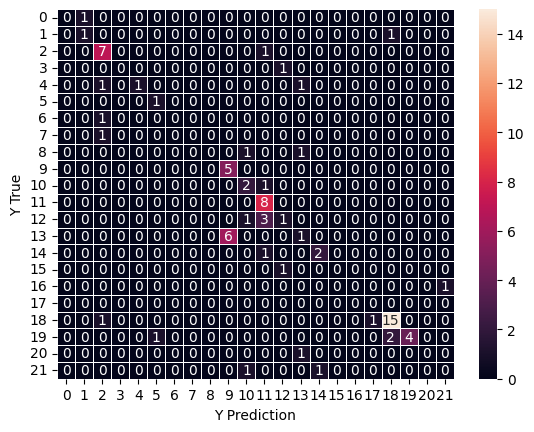

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot = True, linewidths= 0.5, fmt=".0f")
plt.ylabel("Y True")
plt.xlabel("Y Prediction")

In [ ]:
k_scores = []
LOOCV = LeaveOneOut()

for K in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, normalized_x_train, y_train, cv=LOOCV, scoring='accuracy')
    k_scores.append(scores.mean())


best_k = np.argmax(k_scores) + 1
best_score = max(k_scores)

print(f"Best k: {best_k} with accuracy: {best_score}")

Best k: 1 with accuracy: 0.5108695652173914


# PCA

In [ ]:
triple_threat_numeric_df.columns

Index(['Data.Alpha Carotene', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin',
       'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Niacin',
       'Data.Protein', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium',
       'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium',
       'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium',
       'Data.Major Minerals.Sodium', 'Data.Major Minerals.Zinc',
       'Data.Vitamins.Vitamin A - RAE', 'Data.Vitamins.Vitamin B12',
       'Data.Vitamins.Vitamin B6', 'Data.Vitamins.Vitamin C',
       'Data.Vitamins.Vitamin E', 'Data.Vitamins.Vitamin K', 'Oxalate Value',
       'GI Value'],
      dtype='o

In [ ]:
scaler = StandardScaler(with_std = True, with_mean = True)
triple_threat_scaled = scaler.fit_transform(triple_threat_numeric_df)

In [ ]:
PCA_triple_threat = PCA()
PCA_triple_threat.fit(triple_threat_scaled)

PCA()

In [ ]:
scores = PCA_triple_threat.transform(triple_threat_scaled)

In [ ]:
PC1_scores = scores.T[0]
PC2_scores = scores.T[1]

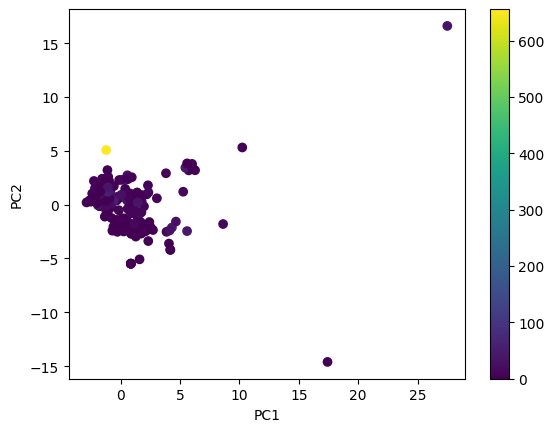

In [ ]:
plt.scatter(PC1_scores, PC2_scores, c = triple_threat_numeric_df['Oxalate Value'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

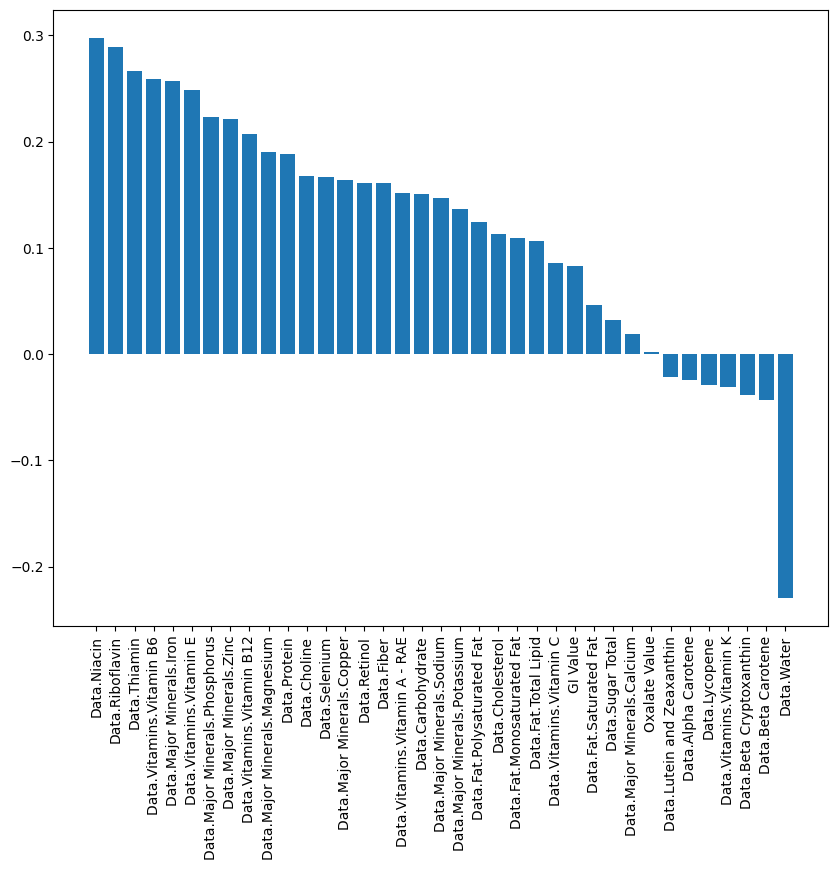

In [ ]:
component_values = PCA_triple_threat.components_[0]
column_names = triple_threat_numeric_df.columns

sorted_indices = np.argsort(component_values)[::-1]

sorted_values = component_values[sorted_indices]
sorted_columns = column_names[sorted_indices]

plt.figure(figsize=(10, 8))
plt.bar(x=sorted_columns, height=sorted_values)
plt.xticks(rotation=90)
plt.show()

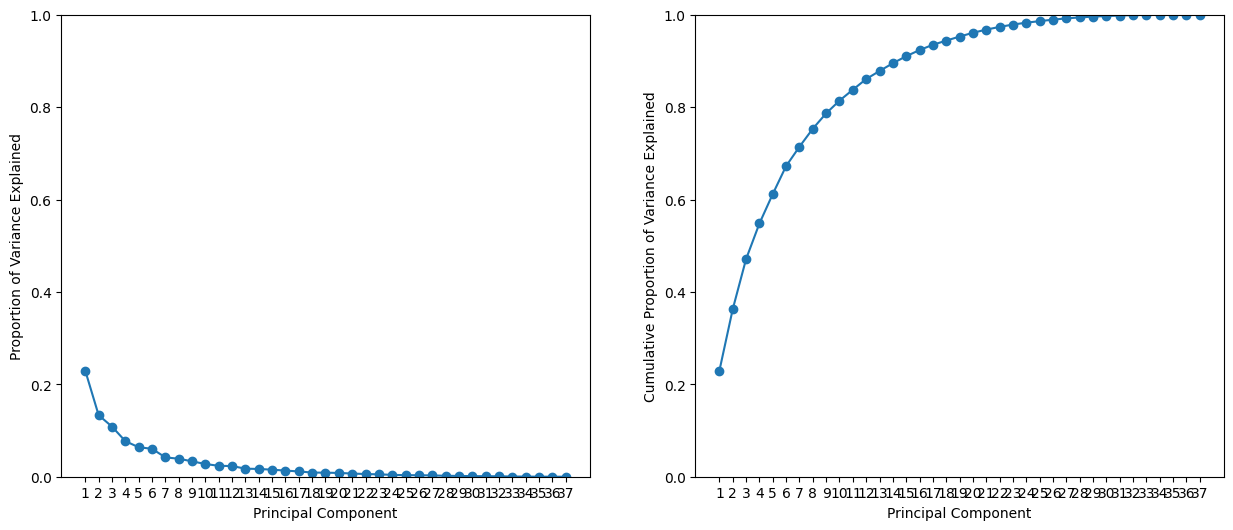

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
ticks = np.arange(PCA_triple_threat.n_components_)+1
ax = axes[0]
ax.plot(ticks,PCA_triple_threat.explained_variance_ratio_, marker = 'o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(ticks, PCA_triple_threat.explained_variance_ratio_.cumsum(),marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

# SVM

## SVM 1: Using only Nutrient Data to predict GI

In [ ]:
# set up features and targets
X = gi_nutrient_numeric_df.drop('GI Value', axis=1)
y = gi_nutrient_numeric_df['GI Value']

In [ ]:
# set test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# scale my data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svr_model = SVR(kernel='rbf')  # rbf = Radial Basis Function kernel
svr_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
y_pred = svr_model.predict(X_test_scaled)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 400.9774375533399
R^2 Score: 0.35120321744314265


### Model fine-tuning

In [ ]:
def optimize_svr(X_train, y_train, X_test, y_test):
    # defines parameter range for Grid Search
    param_grid = {
        'C': [0.1, 1, 10, 100],  # adjust prn
        'gamma': [0.001, 0.01, 0.1, 1],  # adjust prn
        'epsilon': [0.01, 0.1, 1, 10]  # adjust prn
    }

    grid = GridSearchCV(SVR(kernel='rbf'), param_grid, refit=True, verbose=3, cv=5,
                        scoring='neg_mean_squared_error', return_train_score=True)

    # fit model for grid search
    grid.fit(X_train, y_train)

    # print my best parameters
    print("Best parameters found: ", grid.best_params_)
    print("Lowest MSE achieved: ", -grid.best_score_)

    # eval on test data
    y_pred = grid.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    print("Test MSE: ", mse)
    print("Test R^2 Score: ", r_squared)

    # plot results
    results = pd.DataFrame(grid.cv_results_)
    for scoring in ['mean_test_score', 'mean_train_score']:
        for param in param_grid:
            plt.figure(figsize=(8, 6))
            param_name = f"param_{param}"
            plt.plot(results[param_name], results[scoring], label=param)
            plt.title(f'SVR {scoring} vs {param}')
            plt.xlabel(param)
            plt.ylabel(scoring)
            plt.legend()
            plt.show()


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.001;, score=(train=-600.524, test=-593.572) total time=   0.2s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.001;, score=(train=-601.351, test=-552.374) total time=   0.2s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.001;, score=(train=-590.779, test=-583.784) total time=   0.2s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.001;, score=(train=-584.940, test=-626.973) total time=   0.2s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.001;, score=(train=-594.186, test=-620.124) total time=   0.2s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.01;, score=(train=-567.592, test=-562.400) total time=   0.3s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.01;, score=(train=-575.042, test=-524.387) total time=   0.2s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.01;, score=(train=-557.411, test=-556.356) total time=   0.3s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.01;, score=(train=-553.410, test=-601.028) total time=   0.

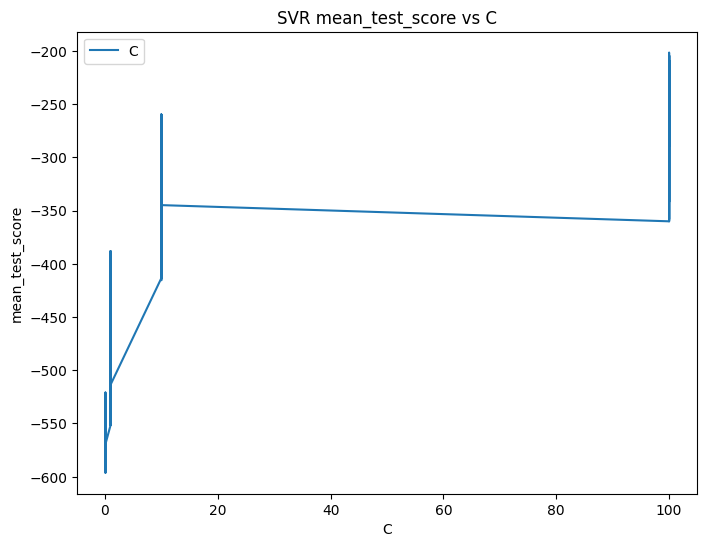

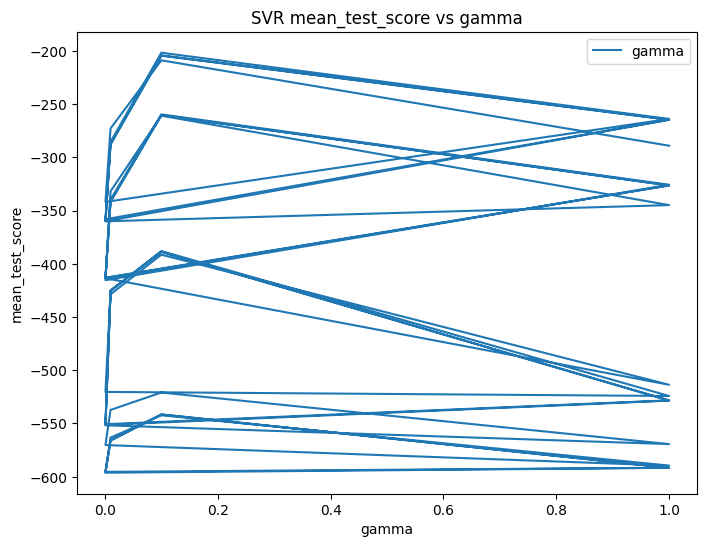

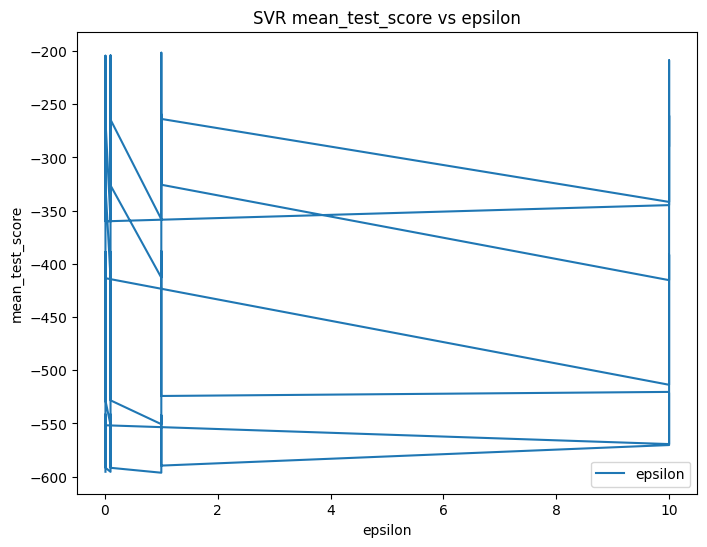

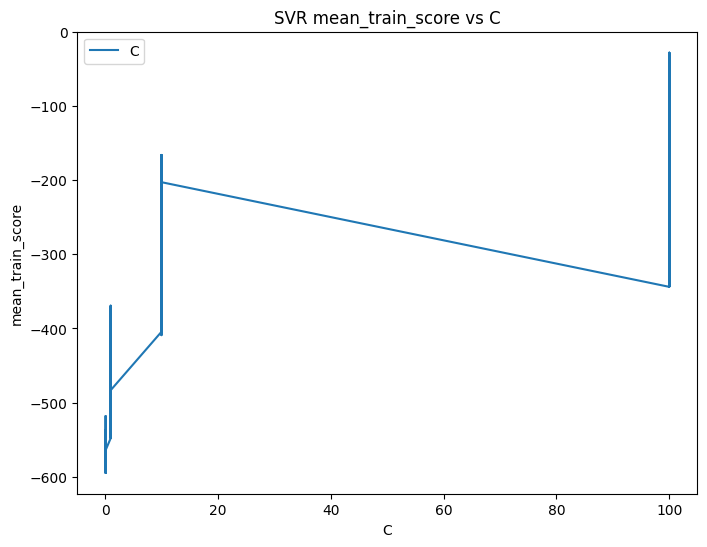

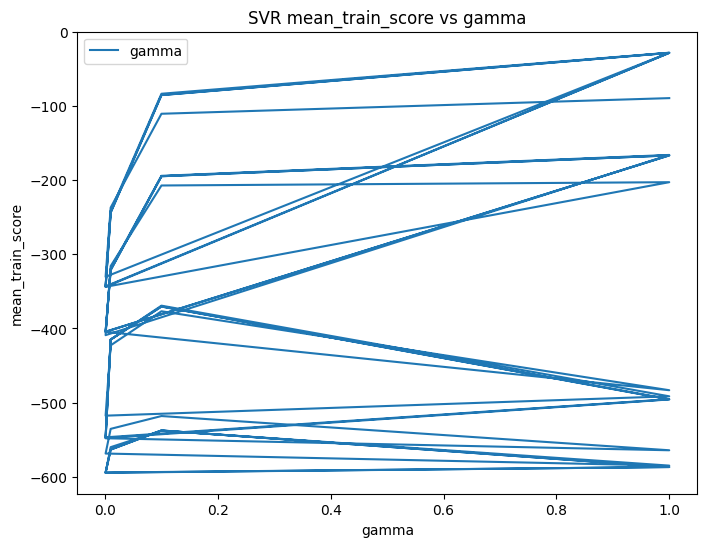

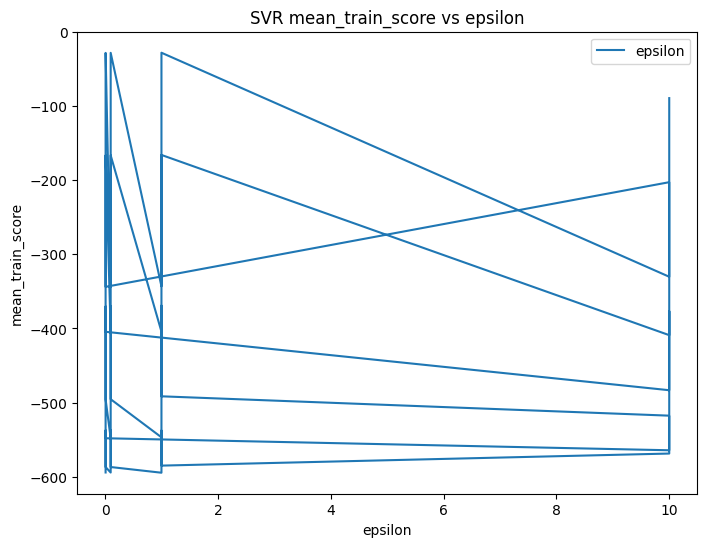

In [ ]:
optimize_svr(X_train_scaled, y_train, X_test_scaled, y_test)